## Classifying Premier Leage Clubs FIFA 20 Decision Tree

Tutorial: [Import Data](https://www.youtube.com/watch?v=l6etd5mUkkY)
Dataset: [FIFA20](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv)

## Import modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data cleaning

In [2]:
df = pd.read_csv('players_20.csv')

df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
df = df[['club', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot']]

In [4]:
df.head()

,club,overall,potential,value_eur,wage_eur,international_reputation,weak_foot
0,FC Barcelona,94,94,95500000,565000,5,4
1,Juventus,93,93,58500000,405000,5,4
2,Paris Saint-Germain,92,92,105500000,290000,5,5
3,Atlético Madrid,91,93,77500000,125000,3,3
4,Real Madrid,91,91,90000000,470000,4,4


In [5]:
df.isna().sum()

club                        0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
international_reputation    0
weak_foot                   0
dtype: int64

In [10]:
df.club.value_counts()

FC Barcelona                  33
Real Valladolid CF            33
VfL Wolfsburg                 33
Crystal Palace                33
Eintracht Frankfurt           33
                              ..
US Orléans Loiret Football     1
Canada                         1
Mexico                         1
Turkey                         1
Śląsk Wrocław                  1
Name: club, Length: 698, dtype: int64

In [13]:
## Select top 4, mid 4, and bottom 4 clubs
df_clubs = df[(df.club == 'Manchester City') | (df.club == 'Liverpool') | (df.club == 'Chelsea') | (df.club == 'Tottenham Hotspur') | 
            (df.club == 'Leiceter City') | (df.club == 'West Ham United') | (df.club == 'Watford') | (df.club == 'Crystal Palace') | 
            (df.club == 'Brighton & Hove Albion') | (df.club == 'Cardiff City') | (df.club == 'Fulham') | (df.club == 'Huddersfield Town')]

In [14]:
## Categoriizing by top 4, mid 4, and bottom 4 clubs
df_clubs.club = df_clubs.club.replace({'Manchester City' : 'top 4', 'Liverpool' : 'top 4', 'Chelsea' : 'top 4', 'Tottenham Hotspur' : 'top 4', 'Leiceter City' : 'mid 4', 'West Ham United' : 'mid 4', 'Watford' : 'mid 4', 'Crystal Palace' : 'mid 4', 'Brighton & Hove Albion' : 'bottom 4', 'Cardiff City' : 'bottom 4', 'Fulham' : 'bottom 4', 'Huddersfield Town' : 'bottom 4', })

df_clubs.club.value_counts()

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


top 4       132
bottom 4    123
mid 4        99
Name: club, dtype: int64

## Train test split

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_clubs.iloc[:, 1:].values
y = df_clubs.club.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

## Model Evaluation

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

print("-----------CONFUSION MATRIX--------------")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("-----------------------------------------")

print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

# 10 fold CV
acc = cross_val_score(dtree, X_test, y_test, cv=10)
print("\n10-fold accuracy for each fold\n {}".format(acc))
print('\n----------------------------------------')
print("10-fold CV Average Accuracy: {:.2f}".format(acc.mean()))

-----------CONFUSION MATRIX--------------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         18      3      1   22
mid 4             4     10      3   17
top 4             2      6     24   32
All              24     19     28   71
-----------------------------------------
Test set accuracy: 0.73

10-fold accuracy for each fold
 [0.75       0.71428571 0.71428571 0.14285714 0.71428571 0.71428571
 0.57142857 0.57142857 0.57142857 1.        ]

----------------------------------------
10-fold CV Average Accuracy: 0.65


## Parameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV

depths = np.arange(2,10)
splits = np.arange(2,10)
leaves = [1, 2, 3]
random_state = [21]

params = {"criterion": ("gini", "entropy"), "splitter": ("best", "random"),
          "max_depth": depths, "min_samples_split": splits, "min_samples_leaf": leaves,
          "random_state": random_state
          }

grid_dtree = GridSearchCV(dtree, params, cv=10)

grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                  

In [26]:
grid_dtree.best_params_


{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'random_state': 21,
 'splitter': 'random'}

In [27]:
# Best model
best_model = grid_dtree.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

In [28]:
# COnfusion Matrix
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,bottom 4,mid 4,top 4,All
True,,,,
bottom 4,15,2,5,22
mid 4,5,9,3,17
top 4,4,8,20,32
All,24,19,28,71


In [29]:
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Test set accuracy: 0.62


## Graph

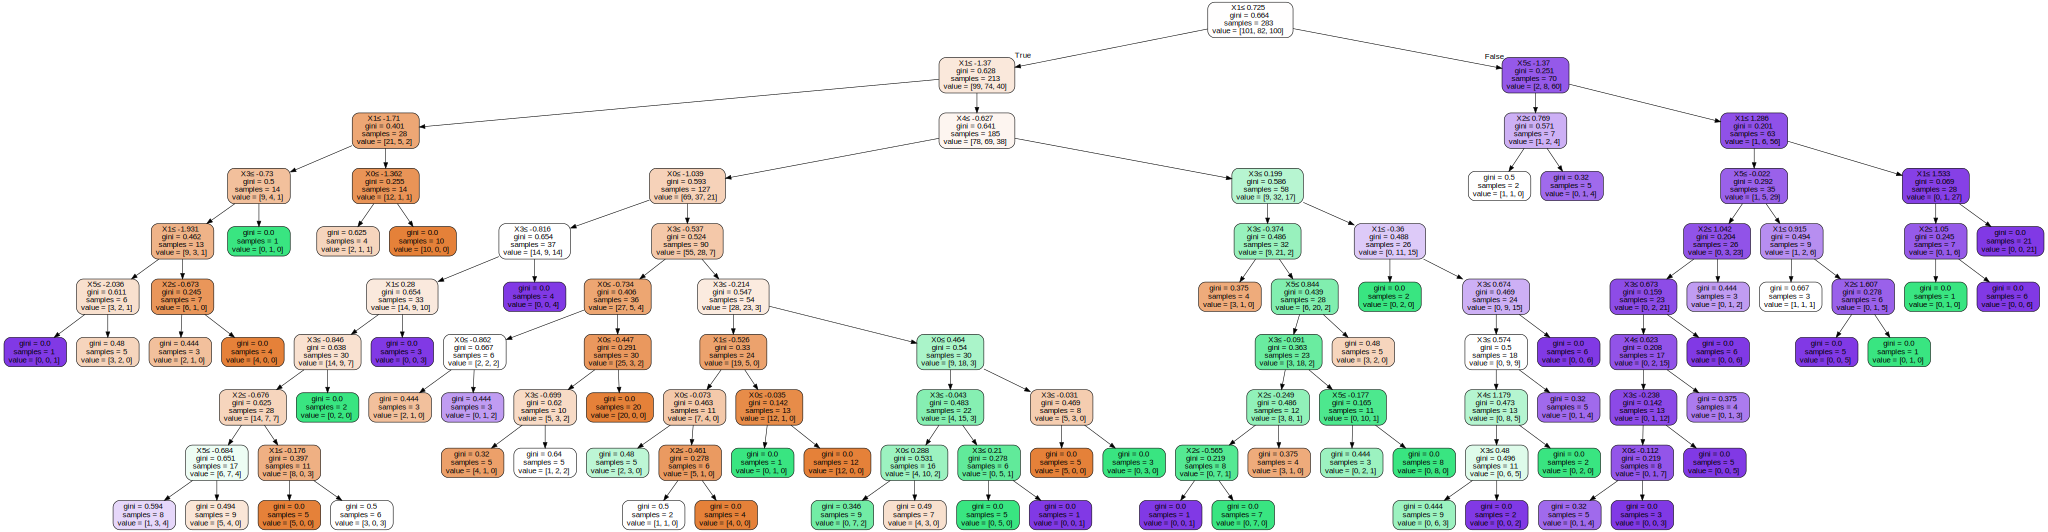

<Figure size 360x360 with 0 Axes>

In [30]:
from matplotlib.pyplot import figure
from sklearn import tree
import graphviz

node_data = tree.export_graphviz(best_model, out_file=None,
                                 filled=True, rounded=True,
                                 special_characters=True)

graph = graphviz.Source(node_data)
plt.figure(figsize=(5,5))
graph